In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


In [52]:
import numpy
import scipy
import matplotlib
import matplotlib.dates as mpd
import pylab as plt
import datetime as dtm
import pytz
import multiprocessing as mpp
import pickle
import os
import json
import subprocess
import h5py
#
import numba
from numba.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning
import warnings
warnings.simplefilter('ignore', category=Warning)
warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=NumbaPendingDeprecationWarning)
#
# TODO: phase out unreferenced hpc_lib calls...
import hpc_lib
#
import platform
print('*** Python Version: ', platform.python_version())
#
system_name='mazama'
# system_name='SERC'
groups_fname=None

groups_fname='mazama_groups.json'
#
#data_file_name='data/sacct_mazama_out_2.out'
#data_file_name = 'data/mazama_usage_20200506_tool8.out'
#data_file_name = 'data/sacct_mazama_out_20200506a.out'

#data_file_name = 'data/sacct_owners_out_3500489.out'

#data_file_name = 'data/sacct_serc_20200622.out'
#data_file_name = 'data/sacct_serc_20200724.out'
#data_file_name = 'data/sacct_mazama_0623_tool8.out'
data_file_name = 'data/sacct_mazama_20200820.out'

output_path = 'output/{}_HPC_analytics'.format(system_name)
#output_path = 'output/HPC_analytics'
#
do_test_run = False
if do_test_run:
    # make a test set:
    k_max=10000
    with open(data_file_name, 'r') as fin:
        #
        nm, ext = os.path.splitext(data_file_name)
        data_file_test_name = '{}_test{}'.format(nm,ext)
        #
        print('** * {}'.format(data_file_test_name))
        #
        with open(data_file_test_name, 'w') as fout:
            for k, rw in enumerate(fin):
                fout.write(rw)
                if k >= k_max:
                    break
                #
            #
        #
    data_file_name = data_file_test_name
    system_name='{}_test'.format(system_name)
    output_path = 'output/{}_HPC_analytics'.format(system_name)
    #
h5_filename='{}.h5'.format(os.path.splitext(data_file_name)[0] )

print('*** data_File_name: {}'.format(data_file_name))
print('*** output path: {}'.format(output_path))
print('*** system_name: {}'.format(system_name))
print('*** h5_filename: {}'.format(h5_filename))

n_cpu=6
pkl_name = "{}.pkl".format(os.path.splitext(data_file_name)[0])


*** Python Version:  3.7.6
*** data_File_name: data/sacct_mazama_20200820.out
*** output path: output/mazama_HPC_analytics
*** system_name: mazama
*** h5_filename: data/sacct_mazama_20200820.h5


In [3]:
load_pickle = True
dump_pickle = True
max_rows = None
# #max_rows = 1000
# #

# if load_pickle:
#     with open(pkl_name, 'rb') as fin:
#         sacct_mazama=pickle.load(fin)
#     #
# else:
#     sacct_mazama = hpc_lib.SACCT_data_handler(data_file_name=data_file_name,
#                     max_rows=max_rows, n_cpu=n_cpu, verbose=0, chunk_size=100)
#     #
#     if dump_pickle:
#         with open(pkl_name, 'wb') as fout:
#                 #out_pkl = pickle.dump(sacct_demo.jobs_summary, fout)
#                 out_pkl = pickle.dump(sacct_mazama, fout)
# #
# print("pre-processing completed...")

pre-processing completed...


In [63]:
# for nm,tp in sacct_mazama.jobs_summary.dtype.descr:
#     print('*** ', nm, tp)
print('*** begin...')
#
sacct_mazama = hpc_lib.SACCT_data_from_h5(h5in_file=h5_filename)
print('*** ', set(sacct_mazama.jobs_summary['NTasks']))

*** begin...
***  {b''}


In [ ]:
# # export to HDF5:
# #
# h5_filename='{}.h5'.format(os.path.splitext(data_file_name)[0] )
# #
# print('h5_filename: ', h5_filename)

# #
# with h5py.File(h5_filename, 'w'):
#     pass
# obj = sacct_mazama

# for ary,nm in zip([obj.jobs_summary, obj.cpu_usage, obj.weekly_hours, obj.daily_hours],
#                   ['jobs_summary', 'cpu_usage', 'weekly_hours', 'daily_hours']):
#     #
#     print('doing dataset: {}'.format(nm) )
#     #
#     hpc_lib.array_to_hdf5_dataset(input_array=ary, dataset_name=nm, output_fname=h5_filename, h5_mode='a',
#                                   verbose=1)

In [ ]:
# for k, jn in enumerate(sacct_mazama.jobs_summary['JobName']):
#     try:
#         sout = jn.encode('ascii')
#     except:
#         print('** broke: {}'.format(jn))
#         print('** ', [ord(c) for c in jn])
#         s2 = jn.replace(chr(8211), '--')
#         s3 = hpc_lib.fix_to_ascii(jn)
#         print('** **: ', s2, s2.encode('ascii'))
#         print('** * *: ', s3)
#     #
#     if k%100000==0: print('** k: ', k)

In [ ]:
# print('*** my_cpu_: ', my_cpu_usage[0:20]==sacct_mazama.cpu_usage[0:20])
# print('*** my_cpu2: ', (my_cpu_usage==sacct_mazama.cpu_usage).all())

**  [(737454.27502398, 27., 2536.) (737454.3202059 , 27., 2536.)
 (737454.36538783, 85., 5320.) (737454.41056975, 27., 2536.)
 (737454.45575167, 31., 2712.) (737454.50093359, 85., 5258.)
 (737454.54611552, 33., 2624.) (737454.59129744, 89., 5280.)
 (737454.63647936, 89., 5200.) (737454.68166129, 78., 3304.)]


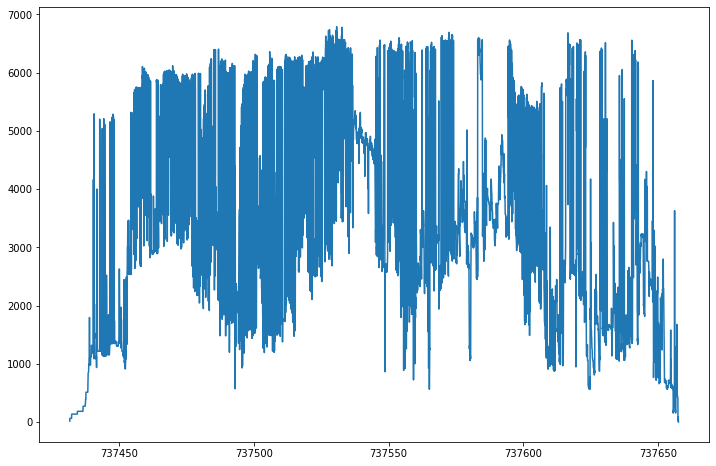

In [64]:
print('** ', sacct_mazama.cpu_usage[500:510])
fg = plt.figure(figsize=(12,8))
ax = plt.gca()
ax.plot(sacct_mazama.cpu_usage['time'], sacct_mazama.cpu_usage['N_cpu'], ls='-')

In [65]:
max_submit, max_start = [mpd.num2date(numpy.nanmax(sacct_mazama.jobs_summary[cl])) for cl in ['Start', 'Submit'] ]
print('*** max_submit: {}, max_start: {}'.format(*[mpd.num2date(numpy.nanmax(sacct_mazama.jobs_summary[cl])) for cl in ['Start', 'Submit'] ]))

*** max_submit: 2020-08-20 13:07:01+00:00, max_start: 2020-08-20 13:07:01+00:00


In [71]:
#
#cpu_usage = sacct_mazama.active_jobs_cpu()
cpu_usage = sacct_mazama.cpu_usage
#
bin_size=7
#cpu_weekly = sacct_mazama.weekly_hours

print('** ', cpu_weekly.dtype.names)

**  ('time', 't_start', 'cpu_hours', 'N_jobs')


[Text(737400.0, 0, '2019-12-7'),
 Text(737450.0, 0, '2020-1-26'),
 Text(737500.0, 0, '2020-3-16'),
 Text(737550.0, 0, '2020-5-5'),
 Text(737600.0, 0, '2020-6-24'),
 Text(737650.0, 0, '2020-8-13'),
 Text(737700.0, 0, '2020-10-2')]

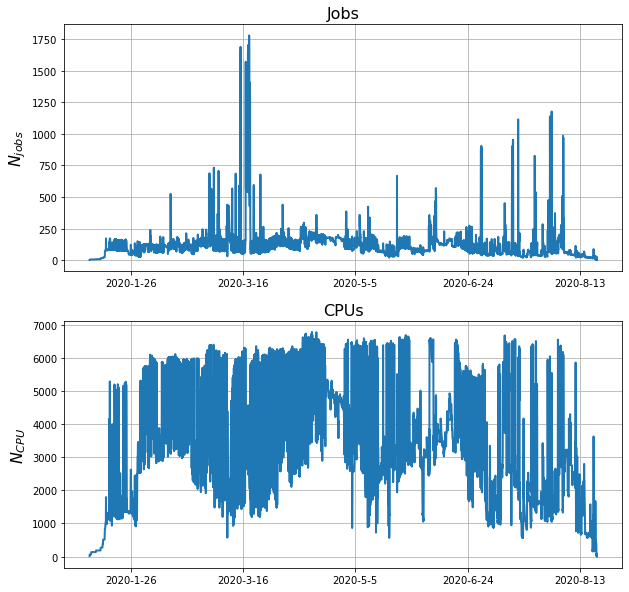

In [72]:
fg = plt.figure(figsize=(10,10))
ax1 = fg.add_subplot('211')
ax2 = fg.add_subplot('212', sharex=ax1)
for ax in (ax1, ax2):
    ax.grid()
#
ax1.plot(cpu_usage['time'], cpu_usage['N_jobs'], ls='-', lw=2., marker='')
#ax1.plot(cpu_weekly['time'], cpu_weekly['N_jobs'], ls='-', lw=2., marker='.')
#
ax2.plot(cpu_usage['time'], cpu_usage['N_cpu'], ls='-', lw=2., marker='')
#ax2.plot(cpu_weekly['time'], cpu_weekly['N_cpu'], ls='-', lw=2., marker='.')
#

ax1.set_title('Jobs', size=16)
ax1.set_ylabel('$N_{jobs}$', size=16)
#
ax2.set_title('CPUs', size=16)
ax2.set_ylabel('$N_{CPU}$', size=16)

fg.canvas.draw()
#
# set ax3 labels to dates:
# now format the datestrings...
lbls = [hpc_lib.simple_date_string(mpd.num2date(float(s.get_text())) ) for s in ax1.get_xticklabels()]
#print('*** ', lbls)
#
ax2.set_xticklabels(lbls)



In [73]:
print('*** ', sacct_mazama.jobs_summary['End'].shape)
print('*** ', (sacct_mazama.jobs_summary[None])['End'].shape)
print('*** ', (sacct_mazama.jobs_summary[(numpy.random.random(len(sacct_mazama.jobs_summary))>.8)])['End'].shape)

***  (3344046,)
***  (1, 3344046)
***  (669896,)


In [ ]:
# #my_ix = numpy.where(numpy.random.random(len(sacct_mazama.jobs_summary))>.75)
# my_weekly_hours = sacct_mazama.get_cpu_hours(bin_size=7, n_points=1000, IX=None)
# fg = plt.figure(figsize=(10,8))
# ax1 = plt.gca()
# ax1.grid()
# #
# ax1.plot(my_weekly_hours['time'], my_weekly_hours['cpu_hours']/7., ls='-', marker='.', label='bins=7 day', zorder=11)
# #ax1.plot(daily_hours['time'], daily_hours['cpu_hours'], ls='-', marker='.', label='bins=1 day', zorder=5)


# #
# fg.canvas.draw()
# #
# # set ax3 labels to dates:
# # now format the datestrings...
# lbls = [hpc_lib.simple_date_string(mpd.num2date(float(s.get_text())) ) for s in ax1.get_xticklabels()]
# #print('*** ', lbls)
# #
# ax1.set_xticklabels(lbls)
# ax1.set_xlabel('Time $t$')
# ax1.set_ylabel('Daily CPU hours')
# ax1.set_title('Daily CPU hours')
# #
# ax1.legend(loc=0)

#ax1.plot(daily_hours['time'][0::len(daily_hours)-1], numpy.ones(2)*123*48*24, ls='--', marker='', lw=3.)

In [74]:
# TODO: these should (optionally? be integrated into the main object and pickled.)
#weekly_hours = sacct_mazama.get_cpu_hours(bin_size=7, n_points=1000)
weekly_hours = sacct_mazama.weekly_hours
daily_hours  = sacct_mazama.daily_hours

#daily_hours = sacct_mazama.get_cpu_hours(bin_size=1, n_points=1000)

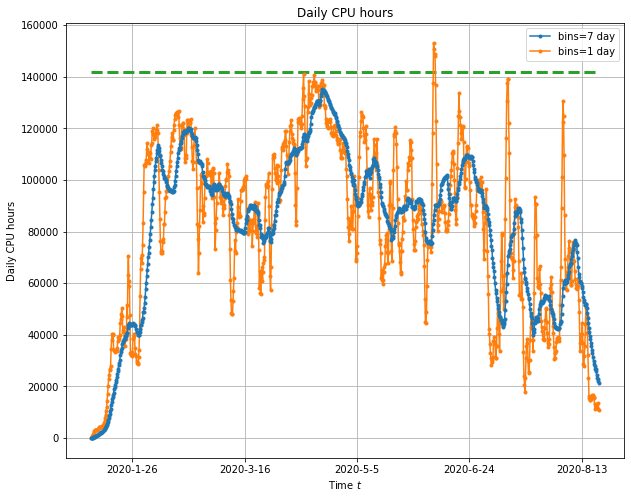

In [75]:
fg = plt.figure(figsize=(10,8))
ax1 = plt.gca()
ax1.grid()
#
ax1.plot(weekly_hours['time'], weekly_hours['cpu_hours']/7., ls='-', marker='.', label='bins=7 day', zorder=11)
ax1.plot(daily_hours['time'], daily_hours['cpu_hours'], ls='-', marker='.', label='bins=1 day', zorder=5)


#
fg.canvas.draw()
#
# set ax3 labels to dates:
# now format the datestrings...
lbls = [hpc_lib.simple_date_string(mpd.num2date(float(s.get_text())) ) for s in ax1.get_xticklabels()]
#print('*** ', lbls)
#
ax1.set_xticklabels(lbls)
ax1.set_xlabel('Time $t$')
ax1.set_ylabel('Daily CPU hours')
ax1.set_title('Daily CPU hours')
#
ax1.legend(loc=0)

ax1.plot(daily_hours['time'][0::len(daily_hours)-1], numpy.ones(2)*123*48*24, ls='--', marker='', lw=3.)
# ax1.plot(daily_hours['time'][0::len(daily_hours)-1], numpy.ones(2)*12*24*24, ls='--', marker='',
#          lw=3., color='r', label='CPU+GPU')
# ax1.plot(daily_hours['time'][0::len(daily_hours)-1], numpy.ones(2)*14*24*24, ls='--', marker='',
#          lw=3., color='g', label='CPU nodes')
# ax1.plot(daily_hours['time'][0::len(daily_hours)-1], numpy.ones(2)*12*24*8, ls='--', marker='',
#          lw=3., color='m',label='9 to 5')
#
ax1.legend(loc=0)
if not os.path.isdir(os.path.join(output_path, 'figs')):
    os.makedirs(os.path.join(output_path, 'figs'))
plt.savefig(os.path.join(output_path, 'figs', 'daily_cpu_hours_all.png'))

In [76]:
# how many active nodes do we have? looks like tasks/cpus show up as 1/thread, so 48 per node, so...
n_max = numpy.max(daily_hours['cpu_hours'])
#
n_nodes = n_max/(24.*48.)
#
print('*** n_max={}, n_nodes={}'.format(n_max, n_nodes))
#140000/(24*48)

*** n_max=153216.62944045477, n_nodes=133.00054638928364


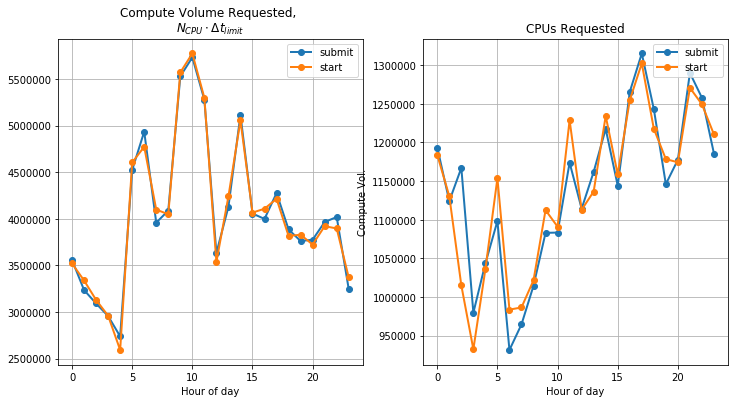

In [77]:
# time of day(-like) compute volume requests.

qs = [.5, .75, .95]
#
# This is TotalCPU, UserCPU, and SystemCPU, so we don't need to compute it any longer.
comp_vol_submit = sacct_mazama.get_submit_compute_vol_timeofday(qs=qs)
comp_vol_start = sacct_mazama.get_submit_compute_vol_timeofday(time_col='Start', qs=qs)
#
fg = plt.figure(figsize=(12,6))
ax1 = fg.add_subplot('121')
ax2 = fg.add_subplot('122')
ax1.grid()
ax2.grid()
#

# N = numpy.sum(comp_vol_submit['cpu-time'])
N = 1.
ax1.plot(comp_vol_submit['time'], comp_vol_submit['cpu-time']/N,
         ls='-', marker='o', lw=2., label='submit')
#print('*** ', numpy.sum(comp_vol_submit['cpu-time']/numpy.sum(comp_vol_submit['cpu-time'])))
#
# N = numpy.sum(comp_vol_start['cpu-time'])
N = 1 
ax1.plot(comp_vol_start['time'], comp_vol_start['cpu-time']/N,
         ls='-', marker='o', lw=2., label='start')
#print('*** ', numpy.sum(comp_vol_start['cpu-time']/N))
#
#N=numpy.sum(comp_vol_submit['cpus'])
N=1.
ax2.plot(comp_vol_submit['time'], comp_vol_submit['cpus']/N, ls='-', marker='o', lw=2., label='submit')

#N=numpy.sum(comp_vol_start['cpus'])
N=1
ax2.plot(comp_vol_start['time'], comp_vol_start['cpus']/N, ls='-', marker='o', lw=2., label='start')
#
#for k,cl in enumerate(comp_vol_tod.dtype.names[2:]):
#    ax1.plot(comp_vol_tod['time'], comp_vol_tod[cl], ls='-', marker='o', lw=2., label='$q={}$'.format(qs[k]))
#    break
#
ax1.legend(loc=0, numpoints=1)
ax1.set_title('Compute Volume Requested, \n$N_{CPU} \cdot \Delta t_{limit}$')
ax1.set_xlabel('Hour of day')
ax2.set_ylabel('Compute Vol.')

ax2.set_title('CPUs Requested')
ax2.set_xlabel('Hour of day')
ax2.legend(loc=1, numpoints=1)

#ax1.set_yscale('log')

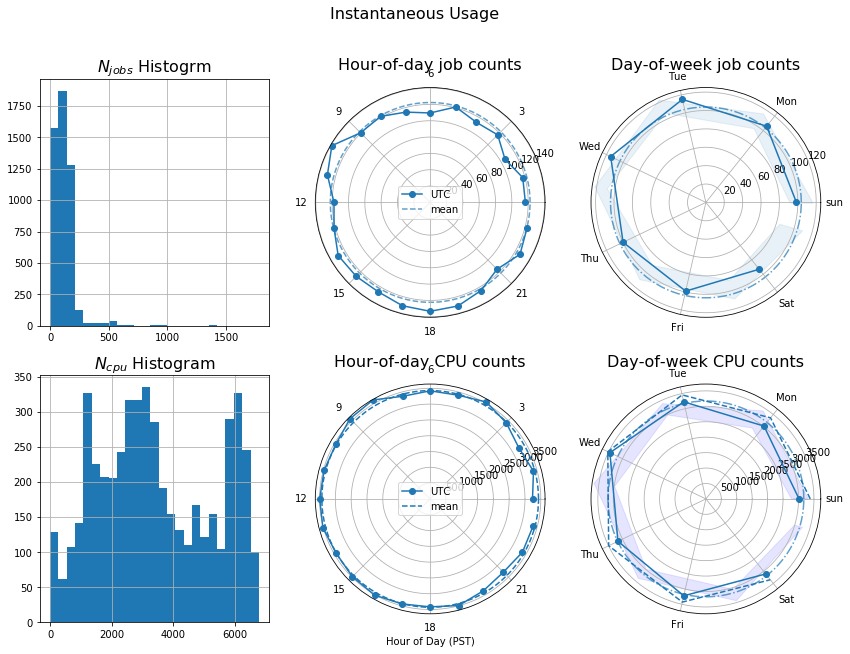

In [78]:
zz = sacct_mazama.active_cpu_jobs_per_day_hour_report(qs=[.45, .5, .55],
                                        figsize=(14,10), cpu_usage=None, periodic_projection='polar')

***  ('index', 'User', 'Group', 'GID', 'JobName', 'JobID', 'JobIDRaw', 'Partition', 'State', 'Timelimit', 'NCPUS', 'NNodes', 'Submit', 'Eligible', 'Start', 'End', 'Elapsed', 'SystemCPU', 'UserCPU', 'TotalCPU', 'NTasks', 'CPUTimeRAW', 'Suspended', 'ReqGRES', 'AllocGRES', 'JobID_parent')


Text(0.5, 1.0, '(Cumulative)')

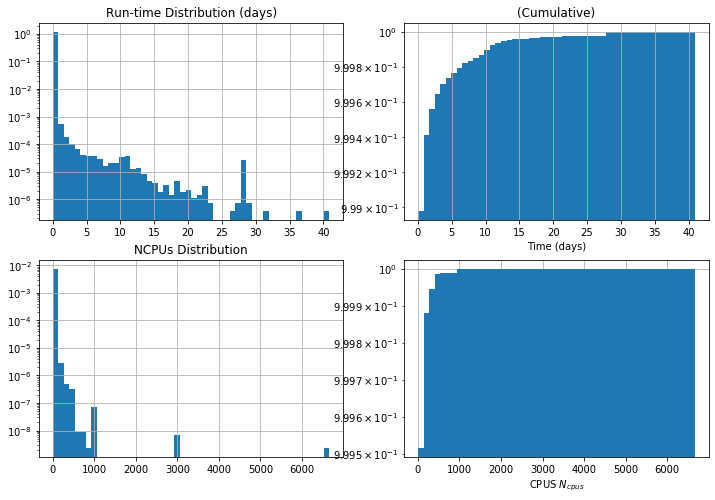

In [79]:
# compute some distributions:
print('*** ', sacct_mazama.jobs_summary.dtype.names)
run_times = sacct_mazama.get_run_times()

#
fg = plt.figure(figsize=(12,8))
ax1 = fg.add_subplot('221')
ax2 = fg.add_subplot('222')
#ax1a.set_yscale('log')
ax3 = fg.add_subplot('223')
ax4 = fg.add_subplot('224')
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
#
hh = ax1.hist(run_times, bins=50, cumulative=False, normed=True, log=True)
hh1c = ax2.hist(run_times, bins=50, cumulative=True, normed=True, log=True, histtype='bar')
#hh1c = ax2.plot(sorted(run_times), numpy.array(numpy.linspace(1./len(run_times), 1.,
#                                                             len(run_times))), lw=3.0, zorder=11)
#
hh2 = ax3.hist(sacct_mazama.jobs_summary['NCPUS'], bins=50, normed=True, log=True)
hh22 = ax4.hist(sacct_mazama.jobs_summary['NCPUS'], bins=50, normed=True, log=True,
                 cumulative=True, histtype='bar', lw=3, zorder=11)
#hh22 = ax4.hist(sacct_mazama.jobs_summary['NCPUS'], bins=50, normed=True, log=True,
#                 cumulative=True, histtype='step', lw=3, zorder=11)
#ax1.plot(run_times, ls='', marker='.')
#print('*** ', run_times[0:20]*24, len(run_times), run_times.shape)
#
ax1.set_title('Run-time Distribution (days)')
ax3.set_title('NCPUs Distribution')
ax2.set_xlabel('Time (days)')
ax4.set_xlabel('CPUS $N_{cpus}$')
#
ax2.set_title("(Cumulative)")
#ax4.set_title("(Cumulative)")

#ax2.set_xlim(-1,800)

In [80]:
print('** ', len(run_times), len(sacct_mazama.jobs_summary['NCPUS']))

**  3344046 3344046


In [81]:
#ix_rt = numpy.argsort(run_times)
run_times_sorted = run_times.copy()
run_times_sorted.sort()
#
k_2 = numpy.searchsorted(run_times_sorted, 2.0)
k_7 = numpy.searchsorted(run_times_sorted, 7.0)
k_14 = numpy.searchsorted(run_times_sorted, 14.0)

#
# k_2 = numpy.searchsorted(run_times[ix_rt], 2.0)
# #k_7 = numpy.searchsorted(run_times[ix_rt], 7.0)
# k_7 = k_2 + numpy.searchsorted( (run_times[ix_rt])[k_2:], 7.0)
# k_14 = k_7 + numpy.searchsorted( (run_times[ix_rt])[k_7:], 14.0)
#
N=float(len(run_times))
print('*** quantiles for t=2,7,14 days: {}, {}, {}'.format(float(k_2)/N, k_7/N, k_14/N))
#
# percent of jobs that use N<24 cores (aka, can run on a single node). Note that these are especially
#. eligible for GCP.
N_24 = numpy.sum(sacct_mazama.jobs_summary['NCPUS']<25)
print('*** N_24/N={}'.format(N_24/N))


*** quantiles for t=2,7,14 days: 0.9994826626188754, 0.9998074189170842, 0.9999509576124251
*** N_24/N=0.9085736260805025


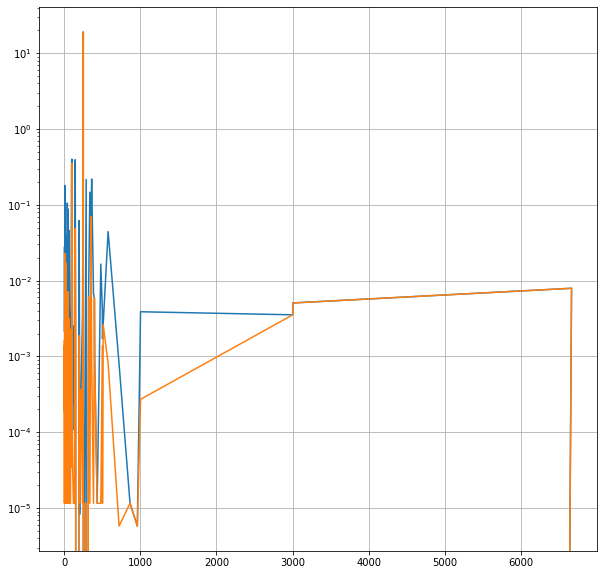

In [82]:
wait_stats = sacct_mazama.get_wait_stats()
#
fg = plt.figure(figsize=(10,10))
ax1 = plt.gca()
ax1.grid()
#
ax1.plot(wait_stats['ncpus'], wait_stats['mean'], ls='-', label='mean')
ax1.plot(wait_stats['ncpus'], wait_stats['median'], ls='-', label='median')
#
#ax1.set_ylim(-.1, .5)
ax1.set_yscale('log')

In [83]:
#t0 = mpd.date2num(dtm.datetime(2019,9,2, tzinfo=pytz.timezone('UTC')))
t0 = mpd.date2num(dtm.datetime(2019,12,30, tzinfo=pytz.timezone('UTC')))
#
bin_size=7
cpu_weekly = sacct_mazama.active_jobs_cpu(bin_size=bin_size, t_min=t0)
#
fg = plt.figure(figsize=(10,10))
plt.suptitle('Weekly Usage')
ax1 = fg.add_subplot('211')
ax2 = fg.add_subplot('212', sharex=ax1)
for ax in (ax1, ax2):
    ax.grid()
#
ax1.plot(cpu_weekly['time'], cpu_weekly['N_jobs'], ls='-', lw=2., marker='')
ax2.plot(cpu_weekly['time'], cpu_weekly['N_cpu'], ls='-', lw=2., marker='')

ax1.set_title('Jobs', size=16)
ax1.set_ylabel('$N_{jobs}$', size=16)
#
ax2.set_title('CPUs', size=16)
ax2.set_ylabel('$N_{CPU}$', size=16)

fg.canvas.draw()
#
# set ax3 labels to dates:
# now format the datestrings...
lbls = [hpc_lib.simple_date_string(mpd.num2date(float(s.get_text())) ) for s in ax1.get_xticklabels()]
print('*** ', lbls)
#
ax2.set_xticklabels(lbls)
#
plt.suptitle('Mazama Activity, $\Delta t_{{binsize}}={}$ days'.format(bin_size))


TypeError: h5py objects cannot be pickled

In [ ]:
# group(s) reports:
with open(groups_fname, 'r') as fin:
    groups = json.load(fin)
#
#
my_groups = {'tgp':groups['tgp']}
#
print('** my_groups: ', my_groups)

In [ ]:
SGRM = hpc_lib.SACCT_groups_analyzer_report_handler(Short_title='Mazama Analytics', 
                                           Full_title='Mazama HPC Analytics Composite Report',
                                          out_path='output/composite_report',
                                          tex_filename='Mazama_analytics_20200820_composite.tex',
                                         SACCT_obj=sacct_mazama)

ix_g = sacct_mazama.jobs_summary['User']=='gegewen'
print('** n_records: ', numpy.sum(ix_g))
# out_path='output/gegewen'
rpt = SGRM.standard_reports_slides(ix=ix_g, group_name='User_gegewen')
#
for partition in ['twohour', 'ere', 'suprib', 'cees', 'suckale', 'schroeder', 'thomas', 'gpu']:
#for partition in ['ere', 'gpu']:
    print('** partition: ', partition)
    ix_p = sacct_mazama.jobs_summary['Partition']==partition
    rpt = SGRM.standard_reports_slides(ix=ix_p, group_name='partition_{}'.format(partition))
SGRM.HPC_tex_obj.render()

In [ ]:
SGR = hpc_lib.SACCT_groups_analyzer_report(Short_title='Mazama Analytics', 
                                           Full_title='Mazama HPC Analytics by User Group',
                                          out_path='output/HPC_analytics_mazama_20200820',
                                          tex_filename='Mazama_analytics_20200820.tex', groups=groups,
                                          add_all_groups=True, SACCT_obj=sacct_mazama)

In [ ]:
print('*** groups.keys(): ', list(groups.keys()))

In [ ]:
print('** something')

In [ ]:
# sacct_mazama.daily_hours['time'], daily_hours['cpu_hours']
#
quants = numpy.quantile(sacct_mazama.daily_hours['cpu_hours'], [.5, .66, .75, .95, .99])

In [ ]:
print('** ', quants/48.)

In [ ]:
print('** ', 48.*130)